# S07 T01: Tasca del test d'hipòtesis

**Objectius**
Calcular el p-valor de diferents variable o conjunt de variables
Interpretar el p-valor i dir si rebutja la hipòtesi nul·la

## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Biography: 1 tail

https://www.machinelearningplus.com/statistics/one-sample-t-test/

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [209]:
df = pd.read_csv('laliga_player_stats_english.csv')

In [210]:
df.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

We remove the players that have NOT played so they don´t affect the statistics of the ones that have played.

Also, as the players that score more goals are the forward players. We focus in them to reduce the goals scored 0 column

In [211]:
df2=df[df['Minutes played']>0].copy()

In [212]:
df2['Position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [213]:
df_forward = df2[df2['Position'] == 'Forward']

In [214]:
df_forward['Goals scored']

24      0
25      1
26     13
27      7
28      2
       ..
527     7
528     3
553     8
554     6
555    10
Name: Goals scored, Length: 93, dtype: int64

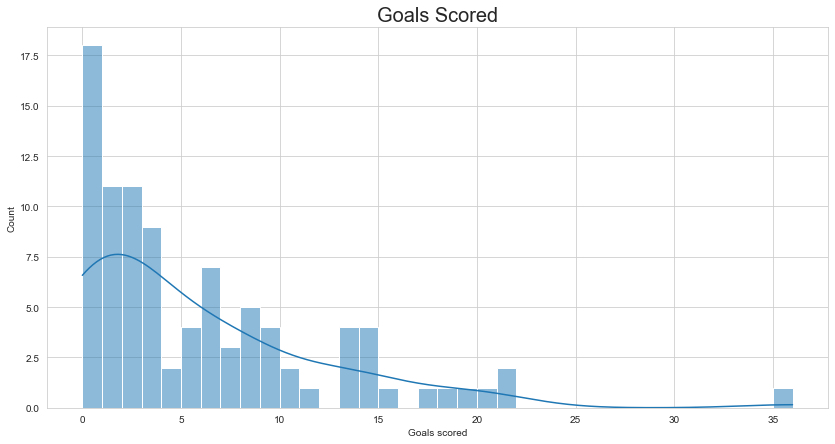

In [215]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
plt.title ('Goals Scored', size=20)
sns.histplot(df_forward['Goals scored'] , kde='True', binwidth=1);

In [216]:
df_forward['Goals scored'].describe()

count    93.000000
mean      5.731183
std       6.438910
min       0.000000
25%       1.000000
50%       3.000000
75%       8.000000
max      36.000000
Name: Goals scored, dtype: float64

In [217]:
df_forward['Goals scored'].quantile(0.54)

4.0

Other statistics:

In [218]:
n, (smin, smax), sm, sv, ss, sk = stats.describe(df_forward['Goals scored'])

In [219]:
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('sample:', sm, sv, ss, sk))

sample:        mean = 5.7312, variance = 41.4596, skew = 1.7665, kurtosis = 4.1992


The graph shows that we do NOT have a normal distribution but we use a test to confirm it.
 * H0 = 'Goals scored' comes from a normal distribution
 * H1 = 'Goals scored' do NOT have a normal distribution

In [220]:
k2, p = stats.normaltest(df_forward['Goals scored'])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.56515e-10
The null hypothesis can be rejected


I notice that the mean is 5.73, but the median is 3 goals and a quartile of 54% with 4 goals . Therfeore we are going to check if the average goals scored by forward players are less than 4.

The Null Hypothesis is that players scores in average 4 or more goals, H0 => 4

The Alternative Hypothesis is that the players scores in average less than 4 goals, H1 < 4

Despite that we don´t have a normal distribution we run a t-test to check the results

In [221]:
stats.ttest_1samp(df_forward['Goals scored'], 4, alternative='less')

Ttest_1sampResult(statistic=2.5928181285737915, pvalue=0.9944632021834314)

α = 5% = 0.05. As P-value > α then the Null Hypothesis can NOT be rejected using a t-test.

This result is expected as the t-test require a normal distribution and compare the values with the mean which is 5.7.



## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

The variables from this data set do not have a normal distribution, so instead of analysing them directly I decide to create some new information that will have a more Gaussian distribution.

Let´s analyse the % of 'Shots on target' from all 'Shots' by the forward players that played some minutes

In [222]:
df_forward['perc_shots_target']=df_forward['Shots on target']/df_forward['Shots']*100

C:\Users\34645\AppData\Local\Temp/ipykernel_5356/624107483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forward['perc_shots_target']=df_forward['Shots on target']/df_forward['Shots']*100


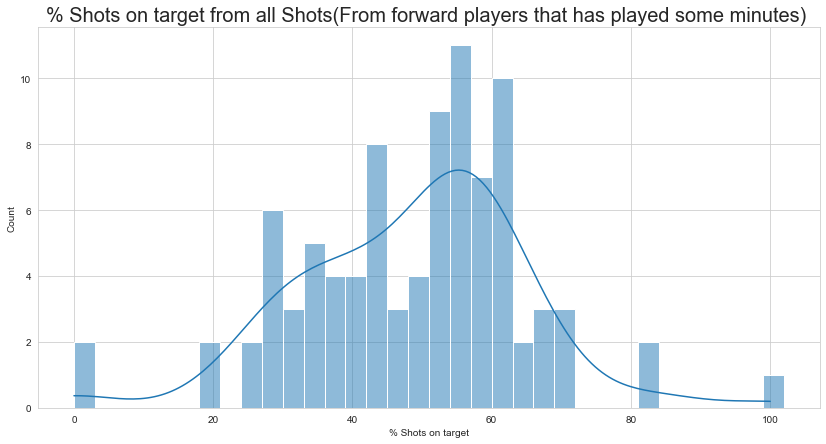

In [246]:
plt.figure(figsize=(14,7))
plt.title ('% Shots on target from all Shots(From forward players that has played some minutes) ', size=20)
plt.xlabel('% Shots on target')
sns.histplot(df_forward['perc_shots_target'], kde='True', binwidth=3);

In [224]:
df_forward['perc_shots_target'].describe()

count     91.000000
mean      48.553759
std       16.270801
min        0.000000
25%       36.931818
50%       51.515152
75%       58.568763
max      100.000000
Name: perc_shots_target, dtype: float64

Our hypothesis is that more that 45% of the shots are on target
 * H0 = shots on taget are <= 45%
 * H1 = shots on taget are > 45%

In [225]:
stat, p = stats.ttest_1samp(df_forward.dropna()['perc_shots_target'], 45, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Shots on taget are <= 45% (fail to reject H0)')
else:
    print('Shots on taget are > 45% (reject H0)')

Statistics=2.561, p=0.006
Shots on taget are > 45% (reject H0)


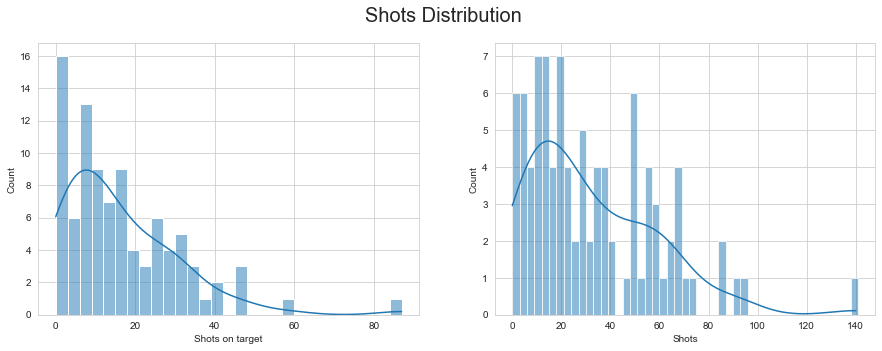

In [226]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Shots Distribution', size=20)
sns.histplot(df_forward['Shots on target'], kde='True', binwidth=3, ax=ax1);
sns.histplot(df_forward['Shots'], kde='True', binwidth=3, ax=ax2);

Both 'Shots' and 'Shots on target' do not have a normal distribution, but we are going to check if they have a correlation in between them.

It is easy to calculate and interpret when both variables have a well understood Gaussian distribution. When we do not know the distribution of the variables, we must use nonparametric rank correlation methods.

The correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson’s correlation. This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.

Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values.

Rank correlation can be calculated for real-valued variables. This is done by first converting the values for each variable into rank data. This is where the values are ordered and assigned an integer rank value. Rank correlation coefficients can then be calculated in order to quantify the association between the two ranked variables.

Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation. 

Rank correlation methods are often named after the researcher or researchers that developed the method. Four examples of rank correlation methods are as follows:

 * Spearman’s Rank Correlation.
 * Kendall’s Rank Correlation.
 * Goodman and Kruskal’s Rank Correlation.
 * Somers’ Rank Correlation.
 
In the following sections, we will take a closer look at two of the more common rank correlation methods: Spearman’s and Kendall’s.

### Spearman’s Rank Correlation
Tests whether two samples have a monotonic relationship.

Assumptions:
 * Observations in each sample are independent and identically distributed (iid).
 * Observations in each sample can be ranked.
 
Interpretation:
 * H0: the two samples are independent.
 * H1: there is a dependency between the samples.

Biography:

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/



In [227]:
# calculate spearman's correlation
coef, p = stats.spearmanr(df2['Shots on target'], df2['Shots'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.949
Samples are correlated (reject H0) p=0.000


### Kendall’s Rank Correlation
Tests whether two samples have a monotonic relationship.

Assumptions:
 * Observations in each sample are independent and identically distributed (iid).
 * Observations in each sample can be ranked.
 
Interpretation:
 * H0: the two samples are independent.
 * H1: there is a dependency between the samples.

In [228]:
# calculate kendall's correlation
coef, p = stats.kendalltau(df2['Shots on target'], df2['Shots'])
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.846
Samples are correlated (reject H0) p=0.000


Both correlations shows that there is a good correlation in between the 2 variables. It also shows that the p value is 0 and therefore H1 (Samples are correlated) is valid.

One of the assumption to use Spearman and Kendall correlations is that the samples are identically distributed.

We can use Wilcoxon non parametric hypothesis test to check if both variables have the same distribution.

NOTE: Very important to note that Wilcoxon do not test the sample directly but the difference in between the samples or the 2 samples.

Biography:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon

Example of how Wilcoxon works.
https://jmyao17.github.io/Statistics/Nonparametric_Statistical_Significance_Tests.html




In [229]:
stat, p = stats.wilcoxon(df2['Shots on target'], df2['Shots'], zero_method='zsplit')

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=2093.000, p=0.000
Different distribution (reject H0)


The result is that the variables 'Shots on target' and 'Shots' do not have the same distribution and therefore the correlation results may not be correct.

We also have to note that 'Shots on target' are also a section of 'Shots', therefore both variables are NOT independent which is another of the test assumptions.

## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

https://jmyao17.github.io/Statistics/Nonparametric_Statistical_Significance_Tests.html

We now calculate the % of Goals from all Shots and the % of Goals from Shots to target.
In both cases we only consider the forward players that have played some minutes.

In [230]:
df_forward['perc_goals_shots']=df_forward['Goals scored']/df_forward['Shots']*100
df_forward['perc_goals_shots_target']=df_forward['Goals scored']/df_forward['Shots on target']*100

C:\Users\34645\AppData\Local\Temp/ipykernel_5356/3707479208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forward['perc_goals_shots']=df_forward['Goals scored']/df_forward['Shots']*100
C:\Users\34645\AppData\Local\Temp/ipykernel_5356/3707479208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forward['perc_goals_shots_target']=df_forward['Goals scored']/df_forward['Shots on target']*100


In [231]:
df_forward['perc_goals_shots']

24      0.000000
25     33.333333
26     23.214286
27     35.000000
28     10.526316
         ...    
527    18.421053
528    15.789474
553    14.814815
554    27.272727
555    20.408163
Name: perc_goals_shots, Length: 93, dtype: float64

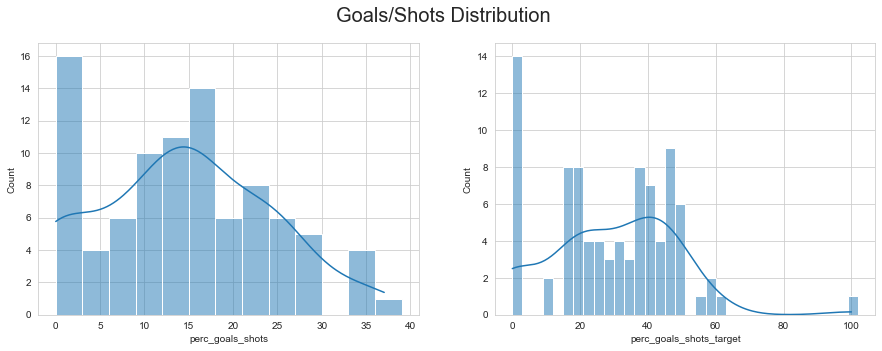

In [232]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Goals/Shots Distribution', size=20)
sns.histplot(df_forward['perc_goals_shots'], kde='True', binwidth=3, ax=ax1);
sns.histplot(df_forward['perc_goals_shots_target'], kde='True', binwidth=3, ax=ax2);

In [233]:
df_forward['perc_goals_shots'].describe()

count    91.000000
mean     14.433285
std       9.811005
min       0.000000
25%       7.142857
50%      14.285714
75%      22.222222
max      37.037037
Name: perc_goals_shots, dtype: float64

We check if the number % of short that end up as a goal are higher than 13%, so the hypothesis is:
 * H0 = Shots converted to goals are <= 13%
 * H1 = Shots converted to goals are > 13%

In [234]:
stat, p = stats.ttest_1samp(df_forward.dropna()['perc_goals_shots'], 13, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Shots converted to goals are <= 13% (fail to reject H0)')
else:
    print('Shots converted to goals are > 13% (reject H0)')

Statistics=1.702, p=0.046
Shots converted to goals are > 13% (reject H0)


We now check if the number % of 'Short on target' that end up as a goal are higher than 40%, so the hypothesis is:
 * H0 = Shots converted to goals are <= 26%
 * H1 = Shots converted to goals are > 26%

In [235]:
df_forward['perc_goals_shots_target'].describe()

count     89.000000
mean      29.392330
std       18.728943
min        0.000000
25%       16.666667
50%       31.250000
75%       43.333333
max      100.000000
Name: perc_goals_shots_target, dtype: float64

In [236]:
stat, p = stats.ttest_1samp(df_forward.dropna()['perc_goals_shots_target'], 26, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Shots on target converted to goals are <= 26% (fail to reject H0)')
else:
    print('Shots on target converted to goals are > 26% (reject H0)')

Statistics=1.645, p=0.052
Shots on target converted to goals are <= 26% (fail to reject H0)


We are close to pass the alternative hypothesis but the probability is less than 95%

We now analyse the number of Goals scored are from penalties. Once again, only considering data from forward players that have played some minutes.

In [237]:
df_forward['perc_penalties_goal']=df_forward['Penalties scored']/df_forward['Goals scored']*100
df_forward['perc_penalties_goal'].describe()

C:\Users\34645\AppData\Local\Temp/ipykernel_5356/705886204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forward['perc_penalties_goal']=df_forward['Penalties scored']/df_forward['Goals scored']*100


count     75.000000
mean      10.470579
std       20.336726
min        0.000000
25%        0.000000
50%        0.000000
75%       14.285714
max      100.000000
Name: perc_penalties_goal, dtype: float64

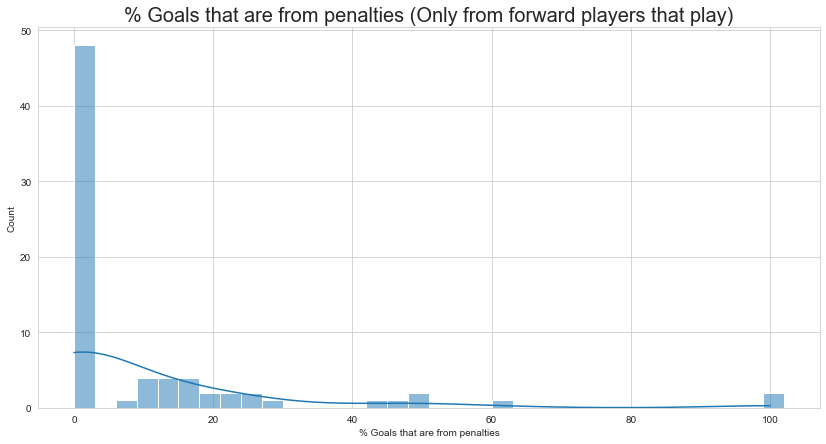

In [238]:
plt.figure(figsize=(14,7))
plt.title ('% Goals that are from penalties (Only from forward players that play)', size=20)
plt.xlabel('% Goals that are from penalties')
sns.histplot(df_forward['perc_penalties_goal'], kde='True', binwidth=3);

In [239]:
stat, p = stats.ttest_1samp(df_forward.dropna()['perc_penalties_goal'], 10, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Forward players (that has played) goals from penalties are <= 10% (fail to reject H0)')
else:
    print('Forward players (that has played) goals from penalties are> 10% (reject H0)')

Statistics=0.258, p=0.399
Forward players (that has played) goals from penalties are <= 10% (fail to reject H0)


In [240]:
df_forward['perc_penalties_goal'].quantile(.66)

9.63076923076924

In [241]:
df_forward['perc_penalties_goal'].quantile(.67)

10.644444444444451

Despite that the mean of goals per penalties is higher than 10%, the quantiles shows that only 2/3 of the players has scored 10% of their goals by penalties

There are several players who's goals are not from penalties, so we can repeit the study discarting the forward players that have not scored any penalties.

We also discard the 2 outlier that scored all their goals by penalties.

In [242]:
x = df_forward['perc_penalties_goal'][(df_forward['perc_penalties_goal']>0) & (df_forward['perc_penalties_goal']<100) ]
x.describe()

count    25.000000
mean     23.411738
std      14.612838
min       7.692308
25%      14.285714
50%      17.647059
75%      26.315789
max      60.000000
Name: perc_penalties_goal, dtype: float64

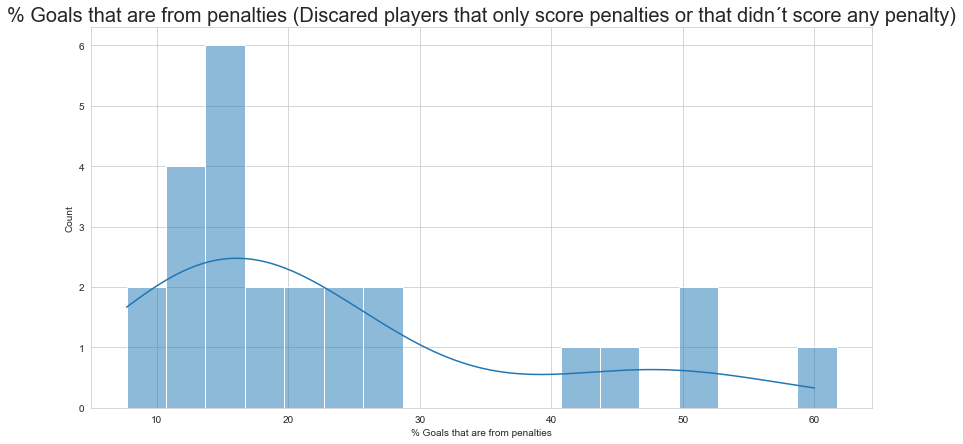

In [243]:
plt.figure(figsize=(14,7))
plt.title ('% Goals that are from penalties (Discared players that only score penalties or that didn´t score any penalty)', size=20)
plt.xlabel('% Goals that are from penalties')
sns.histplot(x, kde='True', binwidth=3);

In [244]:
stat, p = stats.ttest_1samp(x, 18, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Forward players that has played and their goals are a mixture of penalties and not penalties are <= 18% (fail to reject H0)')
else:
    print('Forward players that has played and their goals are a mixture of penalties and not penalties > 18% (reject H0)')

Statistics=1.852, p=0.038
Forward players that has played and their goals are a mixture of penalties and not penalties > 18% (reject H0)
